In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('/Users/delphi/Desktop/works/Deep+Learning+Python/learn/data/.ipynb_checkpoints/fruit2class-checkpoint.csv')

In [69]:
df

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0
5,8.0,3.1,0
6,8.2,4.4,1
7,7.0,4.8,1
8,7.5,3.8,1
9,7.4,5.1,1


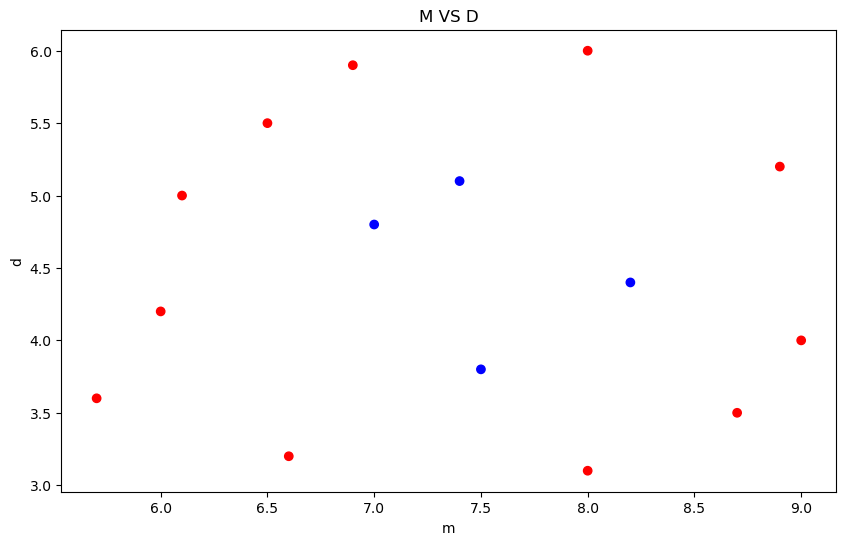

In [70]:
colors = {0: 'red', 1: 'blue'}
plt.figure(figsize=(10, 6))
plt.scatter(df['m'], df['d'], c=df['target'].apply(lambda x: colors[x]))
plt.xlabel('m')
plt.ylabel('d')
plt.title('M VS D')
plt.show()

In [71]:
X = df.iloc[:, :2]

In [72]:
X

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9
5,8.0,3.1
6,8.2,4.4
7,7.0,4.8
8,7.5,3.8
9,7.4,5.1


In [73]:
Y = df.target

In [74]:
Y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
Name: target, dtype: int64

In [75]:
X = np.array(X)

In [76]:
X

array([[6. , 4.2],
       [5.7, 3.6],
       [6.5, 5.5],
       [6.6, 3.2],
       [6.9, 5.9],
       [8. , 3.1],
       [8.2, 4.4],
       [7. , 4.8],
       [7.5, 3.8],
       [7.4, 5.1],
       [8.9, 5.2],
       [8. , 6. ],
       [9. , 4. ],
       [6.1, 5. ],
       [8.7, 3.5]])

In [77]:
Y = np.array(Y)

In [91]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [107]:
df_scaled = pd.DataFrame(X , columns=['m' , 'd'])
df_scaled

,m,d
0,-1.312916,-0.311578
1,-1.601117,-0.963718
2,-0.832581,1.101391
3,-0.736514,-1.398477
4,-0.448313,1.536151
5,0.608425,-1.507167
6,0.800559,-0.094198
7,-0.352246,0.340562
8,0.128089,-0.746338
9,0.032022,0.666632


In [96]:
from sklearn.neural_network import MLPClassifier

In [114]:
model = MLPClassifier(hidden_layer_sizes=(50,), random_state=1, verbose=True , max_iter=900)
model.fit(X , Y)

Iteration 1, loss = 0.78177722
Iteration 2, loss = 0.77590975
Iteration 3, loss = 0.77010795
Iteration 4, loss = 0.76437425
Iteration 5, loss = 0.75873698
Iteration 6, loss = 0.75317727
Iteration 7, loss = 0.74768873
Iteration 8, loss = 0.74227150
Iteration 9, loss = 0.73692174
Iteration 10, loss = 0.73163938
Iteration 11, loss = 0.72642661
Iteration 12, loss = 0.72128416
Iteration 13, loss = 0.71622236
Iteration 14, loss = 0.71124716
Iteration 15, loss = 0.70633911
Iteration 16, loss = 0.70148997
Iteration 17, loss = 0.69670530
Iteration 18, loss = 0.69199550
Iteration 19, loss = 0.68737119
Iteration 20, loss = 0.68281853
Iteration 21, loss = 0.67833714
Iteration 22, loss = 0.67392682
Iteration 23, loss = 0.66959166
Iteration 24, loss = 0.66533888
Iteration 25, loss = 0.66115986
Iteration 26, loss = 0.65706031
Iteration 27, loss = 0.65305717
Iteration 28, loss = 0.64912088
Iteration 29, loss = 0.64525095
Iteration 30, loss = 0.64144690
Iteration 31, loss = 0.63770819
Iteration 32, los

/Users/delphi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=900, random_state=1,
              verbose=True)

In [115]:
Y_pred = model.predict(X)

In [116]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(Y , Y_pred)
print("Accuracy:", accuracy)
print(Y)
print(Y_pred)

Accuracy: 1.0
[0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


In [120]:
!pip install mlxtend

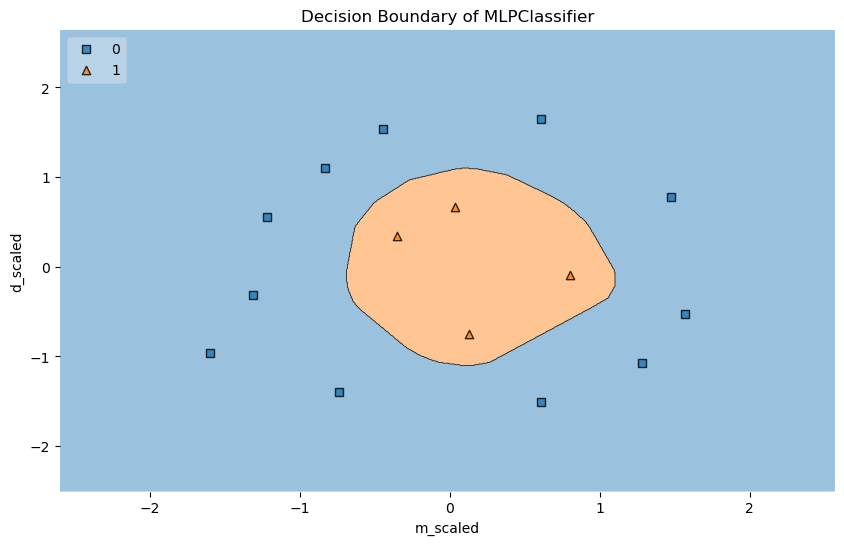

In [121]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X, Y, clf=model, legend=2)
plt.xlabel('m_scaled')
plt.ylabel('d_scaled')
plt.title('Decision Boundary of MLPClassifier')
plt.show()